In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import intake

import funnel

In [5]:
catalog_json_file = funnel.to_intake_esm(agg_member_id=True)

sub_spec = dict(
    name='drift-corrected',
    experiment=['20C', 'RCP85'],
)

catalog = funnel.to_intake_esm(agg_member_id=True).search(**sub_spec)
catalog

,unique
experiment,2
component,1
stream,1
member_id,34
variable,8
name,1
path,1642
Eo,6
dEodT,1
Ac,6


In [7]:
cat = catalog.search(variable='depth_habitat_trait_wgt')
dsets = cat.to_dataset_dict()
dsets


--> The keys in the returned dictionary of datasets are constructed as follows:
	'experiment.component.stream.name'


{'20C.ocn.pop.h.drift-corrected': <xarray.Dataset>
 Dimensions:                  (nlat: 384, nlon: 320, member_id: 22, time: 1032, z_t: 40)
 Coordinates:
     Ac                       float64 0.0258
     Eo                       float64 -0.2
     KMT                      (nlat, nlon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
     TAREA                    (nlat, nlon) float64 1.125e+13 ... 7.432e+12
     TLAT                     (nlat, nlon) float64 -79.22 -79.22 ... 72.19 72.19
     TLONG                    (nlat, nlon) float64 320.6 321.7 ... 319.4 319.8
     ULAT                     (nlat, nlon) float64 -78.95 -78.95 ... 72.41 72.41
     ULONG                    (nlat, nlon) float64 321.1 322.3 ... 319.6 320.0
     dz                       (z_t) float32 1e+03 1e+03 ... 9.844e+03 1.133e+04
   * time                     (time) object 1920-01-17 00:29:59.999993 ... 200...
   * z_t                      (z_t) float32 500.0 1.5e+03 ... 8.788e+04 9.847e+04
   * member_id                (member_id

In [8]:
ds = (dsets['20C.ocn.pop.h.drift-corrected'] * dsets['20C.ocn.pop.h.drift-corrected'].TAREA).sum(['nlat', 'nlon']).compute()
ds

<xarray.Dataset>
Dimensions:                  (z_t: 40, time: 1032, member_id: 22)
Coordinates:
    Ac                       float64 0.0258
    Eo                       float64 -0.2
    dz                       (z_t) float32 1e+03 1e+03 ... 9.844e+03 1.133e+04
  * time                     (time) object 1920-01-17 00:29:59.999993 ... 200...
  * z_t                      (z_t) float32 500.0 1.5e+03 ... 8.788e+04 9.847e+04
  * member_id                (member_id) int64 2 9 10 11 12 ... 25 26 27 28 29
Data variables:
    depth_habitat_trait_wgt  (member_id, time) float64 1.864e+23 ... 1.849e+23

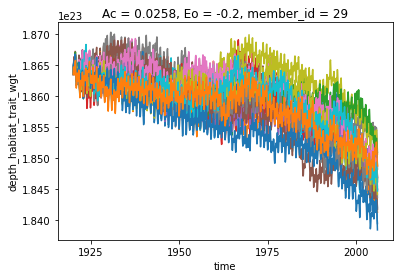

In [9]:
for member_id in ds.member_id.values:
    ds.depth_habitat_trait_wgt.sel(member_id=member_id).plot()

In [ ]:
member_id